# Step 1 - Look at the Big Picture


In [ ]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "codeathon_1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Step 2 - Get the Data

In [ ]:
# import to support zip files
from zipfile import ZipFile 
  
# specify the file name 
file_name = "/content/data/1815_3139_bundle_archive.zip"
  
# open the file in read mode 
with ZipFile(file_name, 'r') as zip: 
    # print the file's contents
    zip.printdir() 
    # unzip the file 
    print('Extracting all the files now...') 
    zip.extractall(path="/content/data/") 
    print('Done!') 
  
# now we have the data in a csv file in the data folder

File Name                                             Modified             Size
housing.csv                                    2019-09-20 21:05:22        49082
Extracting all the files now...
Done!


In [ ]:
import pandas as pd # Pandas module to enable data manipulation

def load_housing_data(data_path="/content/data/"):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path, header=None, delim_whitespace=True)

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
# add column names
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PRATIO", "B", "LSTAT", "MEDV"]
housing.columns = headers
print(housing)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0    15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0    17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0    17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0    18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0    18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...     ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0    21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0    21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0    21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0    21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0    21.0  396.90   7.88  11.9

[506 rows x 14 columns]


# Step 3 - Explore and Visualize the Data to Gain Insights

In [ ]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Provide some basic statistics about the dataset and each feature
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


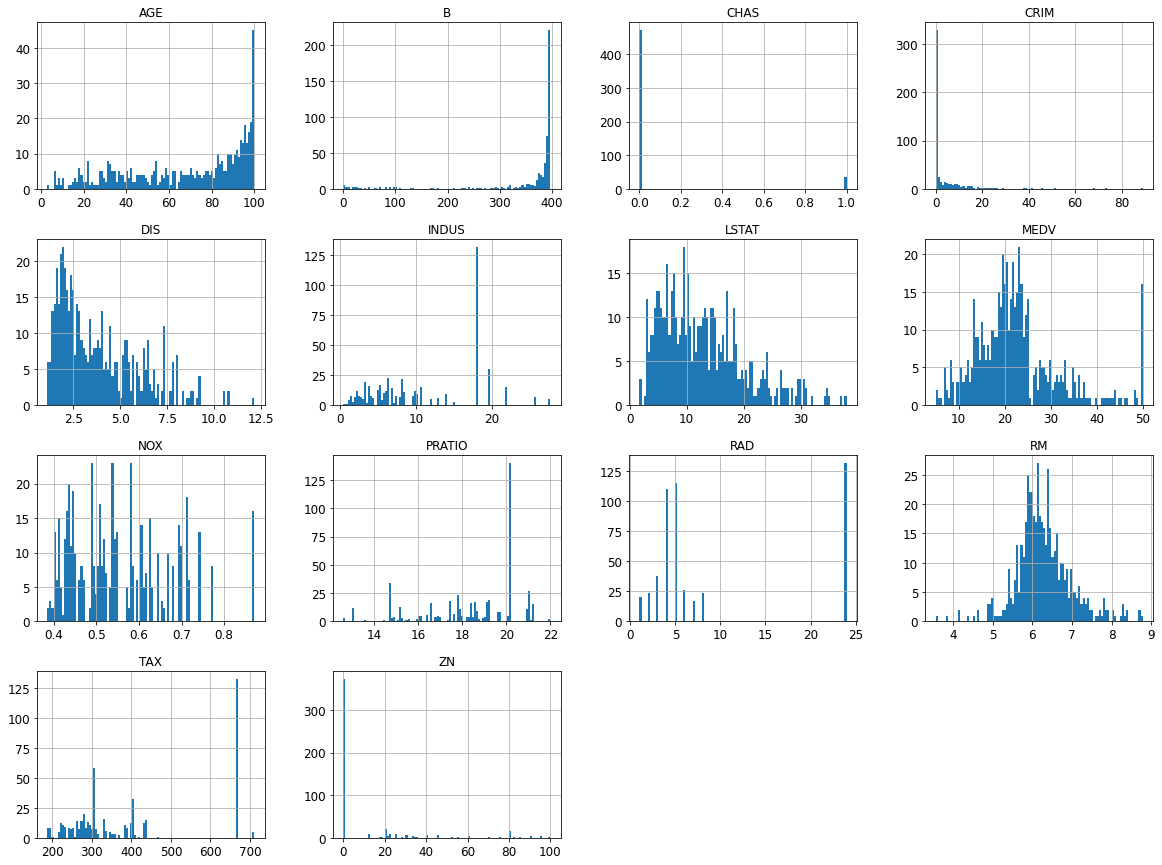

In [ ]:
# Show the histograms for each feature
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape
# Let's look at how much each feature correlates to the median house value
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV      1.000000
RM        0.695360
ZN        0.360445
B         0.333461
DIS       0.249929
CHAS      0.175260
AGE      -0.376955
RAD      -0.381626
CRIM     -0.388305
NOX      -0.427321
TAX      -0.468536
INDUS    -0.483725
PRATIO   -0.507787
LSTAT    -0.737663
Name: MEDV, dtype: float64

(0.0, 50.0, 0.0, 50.0)

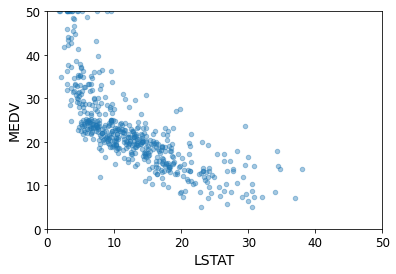

In [ ]:
housing.drop('CHAS', axis=1)
housing.plot(kind="scatter", x="LSTAT", y="MEDV",
             alpha=0.4)
plt.axis([0, 50, 0, 50])

(0.0, 10.0, 0.0, 50.0)

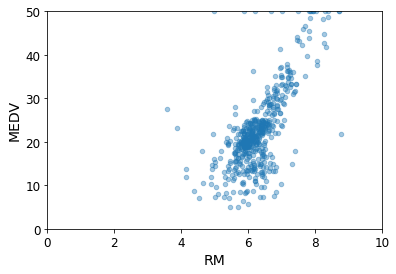

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV",
             alpha=0.4)
plt.axis([0, 10, 0, 50])

# Step 4 - Prepare Data for ML Algorithms

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print( train_set.shape )
print( test_set.shape )

(404, 14)
(102, 14)


In [ ]:
# Create the features and labels for training
housing = train_set.drop(["MEDV", 'CHAS'], axis=1) # drop labels for training set
housing_labels = train_set["MEDV"].copy()

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT


In [ ]:
# Drop any rows with null values (none in this training set)
sample_incomplete_rows.dropna()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT


In [ ]:
# Create a numerical pipeline that will scale categories and fill in missing values with an imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy="median")),
    ])

housing_prepared = num_pipeline.fit_transform(housing)
print(housing.shape)
print(housing_prepared.shape)

(404, 12)
(404, 12)


In [ ]:
housing_prepared

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

# Step 5 - Select and Train a Model

In [ ]:
# Start with a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [11.02017669 19.48872972 23.05182653 12.1079569  18.42155618]


In [ ]:
# Compare to actual values
print("Labels:", list(some_labels))

Labels: [12.0, 19.9, 19.4, 13.4, 18.2]


In [ ]:
# Get RMSE for linear regression
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.7023887315999335

In [ ]:
# Get MAE for linear regression
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.3261556522008475

In [ ]:
# Now try a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.94978488 5.89421143 6.40173588 6.39868814 4.12878614]
Mean: 5.554641293289953
Standard deviation: 0.8881673692033569


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.0734403  5.80770996 4.97021003 4.5915923  4.87685921]
Mean: 4.8639623608905485
Standard deviation: 0.5659019339422134


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.3959029584132743

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.54940184 4.8614627  3.80678225 3.2248479  3.62769482]
Mean: 3.8140379024483275
Standard deviation: 0.5566061811361064


# Step 6 - Fine Tune the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 12 combinations with bootstrap set to False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds for a total of 120 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(["MEDV", "CHAS"], axis=1)
y_test = test_set["MEDV"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [203]:
final_rmse

2.7157176657537785

In [202]:
forest_scores = cross_val_score(final_model, X_test_prepared, y_test,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.96300791 2.61483213 3.21700706 3.06003731 8.12757217]
Mean: 3.9964913180501727
Standard deviation: 2.074967031493904


In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

1.8935294117647068

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.52881784, 3.52320322])

Text(0.5, 1.0, 'Predictions (black) of Boston Housing Values (blue)')

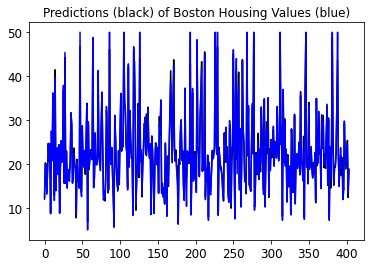

In [211]:
p_arr = np.array(housing_predictions)
a_arr = np.array(housing_labels)
plt.plot(p_arr, color="black")
plt.plot(a_arr, color="blue")
plt.title("Predictions (black) of Boston Housing Values (blue)")

# Step 7 - Presenting My Solution

Through the Machine Learning Process I was able to use a Random Forest Regression Model to achieve an RMSE score of 3.814. 

To start this process, I imported the Boston Housing Data and viewed the histograms for each feature. Based on the histograms, I decided not to use stratified sampling and instead used purely random sampling to split up the dataset into training and test sets. Although some features (mainly AGE, B, and CRIM) were "tail heavy", I did not think these features were important enought to warrant stratified sampling. 



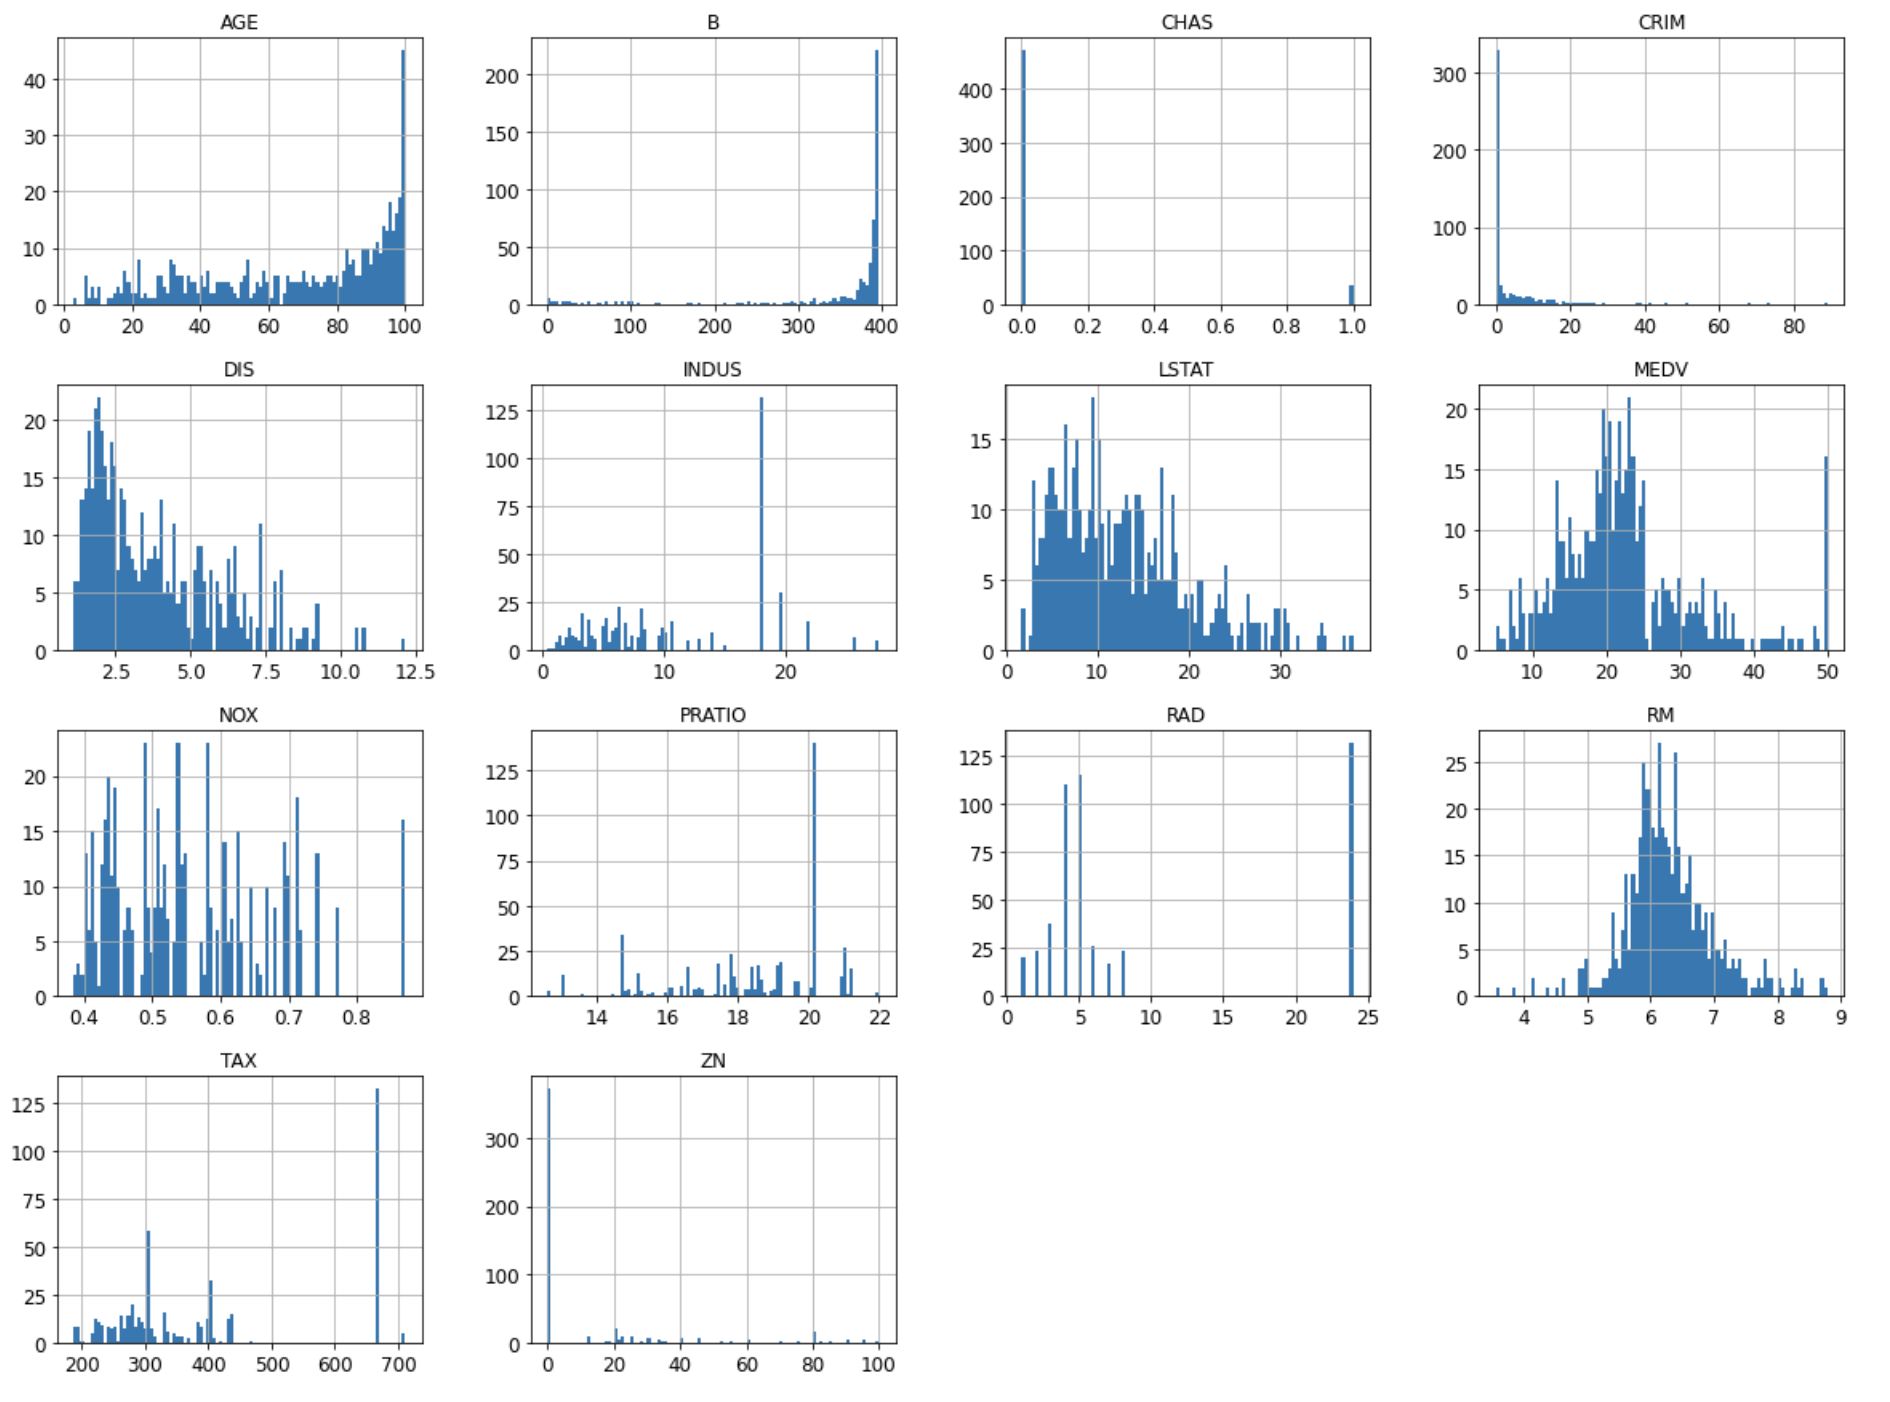

In [ ]:
from IPython.display import Image
Image('/content/images/codeathon_1/img1.png')

I also viewed each features correlation with the median value of owner-occupied homes (MEDV). Based on this, I decided that CHAS was not important to the model due to its low correlation with MEDV, so I dropped the feature from the dataset.

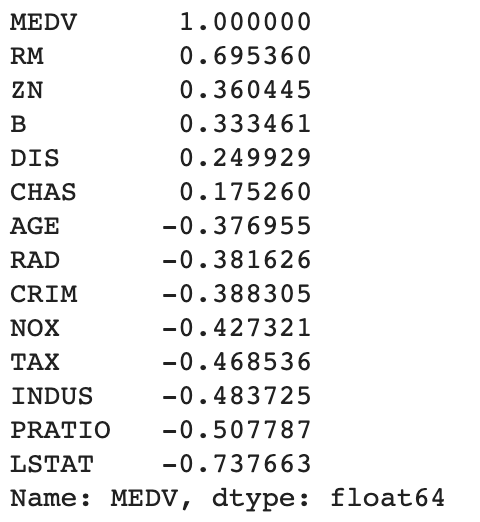

In [ ]:
Image('/content/images/codeathon_1/img2.png')

After preparing the data, I tested three different models. Using 5-Fold Cross-Validation, the Linear Regression Model achieved an RMSE of 4.864, the Decision Tree Regressor achieved an RMSE of 5.555, and the Random Forest Regressor achieved an RMSE of 3.814.

Due to the Random Forest Regressor achieving the lowest RMSE score and lowest training error, I proceeded with this model for the final stage. This included tuning the hyperparameters of the model. By using a grid search approach, I found that using 'bootstrap': False, 'max_features': 4, 'n_estimators': 30 with the Random Forest Regressor would achieve the best results. When using this model on the test set, I was able to achieve an RMSE value of 3.996.

To get to this final model, I had to make a few assumptions. Two of these assumptions I already described. One being that I assumed stratified sampling wasn't needed because those features that were tail heavy were not important enough. The other was that I assumed the CHAS feature was not important to the model due to its low correlation with MEDV. Another assumption I made throughout this process was that there would not be a linear relationship between the features and the label (MEDV). The Random Forest Regressor worked best for me based on these assumptions. 

I also used Reduced Mean Square Error (RMSE) throughout this process as a way to evaluate various models. RMSE tells you how close the predicted values from the model are to the actual values. This means that the lower the score, the more accurate our model was. In this context, a lower RMSE means that our model's predictions for the housing prices was closer to the actual prices than a model with a higher RMSE. From this image you can see how close our model was when predicting house values on the test set as compared to the actual house values.

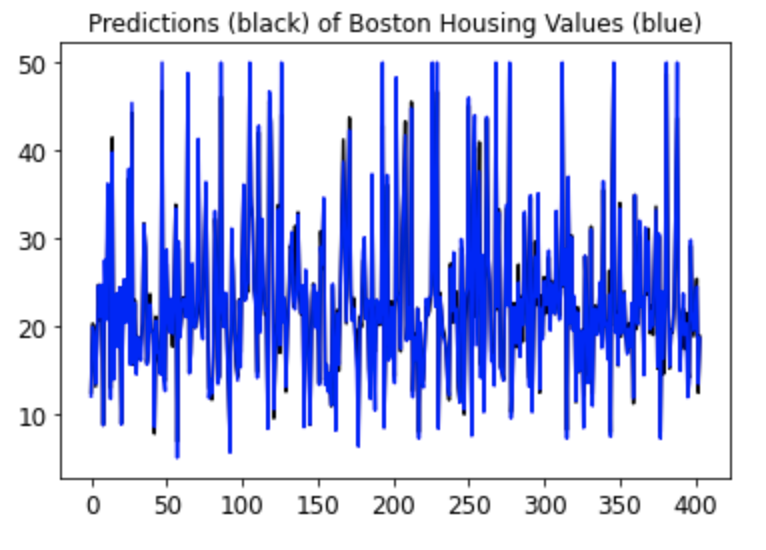

In [212]:
Image('/content/images/codeathon_1/img3.png')

By making these decisions and assumptions, I was able to find the best model and reduce the error over time. The dataset used in this provide some limitations to the system. To start, the data is from 1970 so it most likely outdated, and the model may not predict current housing prices accurately. The data also has very little information about the homes themselves besides the RM feature which describes the average number of rooms per home, and AGE which describes how old the homes are. Besides these two features, the rest focus on the surrounding area. If the data were to include more features about the homes themselves, the model may become more accurate, but that is impossible to say without actually training the model on new data. Limitations of this system also include that it is only for Boston Housing, and that it only works with the exact features in the dataset (minus CHAS).